In [34]:
#Librerias
import numpy as np
import pandas as pd
import math as mat

import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# No presentar Advertencia
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)



In [43]:
# Base de datos
datos = pd.read_excel('datos_depurados_excel.xlsx')
df = pd.DataFrame(datos)
df = df.iloc[:, :]
df.head()

,id,finalACMPrice,originalPrice,area,bathrooms,rooms,garages,type,City,location
0,21654,382.0,390.0,20,1,1,0,APA,BogotÃ¡,POINT (4.75155221 -74.05725996)
1,10357,219.0,210.0,24,2,2,1,CAS,BogotÃ¡,POINT (4.5834460258484 -74.155975341797)
2,8682,607.0,600.0,25,1,5,1,CAS,BogotÃ¡,POINT (-74.03879480426 4.6974971384783)
3,6919,235.0,240.0,25,3,3,1,CAS,MedellÃ­n,POINT (-74.084359109402 4.7465266294171)
4,11824,491.0,490.0,25,2,3,1,APA,BogotÃ¡,POINT (6.2439528 -75.58545)


In [44]:
# dimesiones
df.shape

(7240, 10)

In [45]:
# estadisticas
df.describe()

,id,finalACMPrice,originalPrice,area,bathrooms,rooms,garages
count,7240.000000,7240.000000,7240.000000,7240.000000,7240.000000,7240.000000,7240.000000
mean,21266.571271,288.225656,288.270132,82.842541,2.038950,2.970856,0.624586
std,8785.422347,151.586162,151.408281,54.505220,0.839603,0.888512,0.756938
min,8.000000,7.100000,10.100000,20.000000,1.000000,1.000000,0.000000
25%,15522.000000,170.000000,170.000000,54.000000,2.000000,3.000000,0.000000
50%,21046.500000,248.000000,250.000000,67.000000,2.000000,3.000000,0.000000
75%,29035.750000,371.000000,370.000000,85.000000,2.000000,3.000000,1.000000
max,34791.000000,992.000000,990.000000,1115.000000,7.000000,6.000000,5.000000


In [46]:
# Estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7240 non-null   int64  
 1   finalACMPrice  7240 non-null   float64
 2   originalPrice  7240 non-null   float64
 3   area           7240 non-null   int64  
 4   bathrooms      7240 non-null   int64  
 5   rooms          7240 non-null   int64  
 6   garages        7240 non-null   int64  
 7   type           7240 non-null   object 
 8   City           7240 non-null   object 
 9   location       7240 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 565.8+ KB


In [47]:
#Valores Nulos
df.isnull().sum()

id               0
finalACMPrice    0
originalPrice    0
area             0
bathrooms        0
rooms            0
garages          0
type             0
City             0
location         0
dtype: int64

In [48]:
# Eliminar variables con mas del 50% datos faltantes
#df2 = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 10,11,12]]
df2=df
df2

,id,finalACMPrice,originalPrice,area,bathrooms,rooms,garages,type,City,location
0,21654,382.0,390.0,20,1,1,0,APA,BogotÃ¡,POINT (4.75155221 -74.05725996)
1,10357,219.0,210.0,24,2,2,1,CAS,BogotÃ¡,POINT (4.5834460258484 -74.155975341797)
2,8682,607.0,600.0,25,1,5,1,CAS,BogotÃ¡,POINT (-74.03879480426 4.6974971384783)
3,6919,235.0,240.0,25,3,3,1,CAS,MedellÃ­n,POINT (-74.084359109402 4.7465266294171)
4,11824,491.0,490.0,25,2,3,1,APA,BogotÃ¡,POINT (6.2439528 -75.58545)
...,...,...,...,...,...,...,...,...,...,...
7235,16792,515.0,520.0,300,2,3,1,CAS,BogotÃ¡,POINT (4.721863 -74.03642)
7236,33535,564.0,560.0,300,2,3,0,APA,MedellÃ­n,POINT (6.1798535721365 -75.586581230164)
7237,33522,675.0,668.0,300,2,3,0,CAS,MedellÃ­n,POINT (4.8687603369878 -74.061080472327)
7238,33995,701.0,700.0,300,2,3,0,APA,BogotÃ¡,POINT (4.7442904 -74.0665878)


In [49]:
# División variables Numerica y Categorica
numerical_features = ["finalACMPrice", 'originalPrice', 'area', 'bathrooms', 'rooms','garages']
categorical_features = ['type', 'City']


In [42]:
#FILTROS
#df2 = df2[df2.City.isin(['Medellín', 'Bogotá'])]
#df2=df2[df2['type'] != 'APE']
#df2

,id,finalACMPrice,originalPrice,area,bathrooms,rooms,garages,type,City,location


In [50]:
# Mirar Distribución variables

def desc_num_feature(x):
    feature_name = x
    fig, ax = plt.subplots(figsize=(10, 4))
    df2[feature_name].hist(bins=30, edgecolor='b')
    ax.set_title(feature_name, size=25)
    df2[feature_name].describe().round(2)


def desc_cat_feature(y):
    feature_name = y
    fig, ax = plt.subplots(figsize=(10, 4))
    df2[feature_name].value_counts().plot(kind='bar')
    ax.set_title(feature_name, size=25)

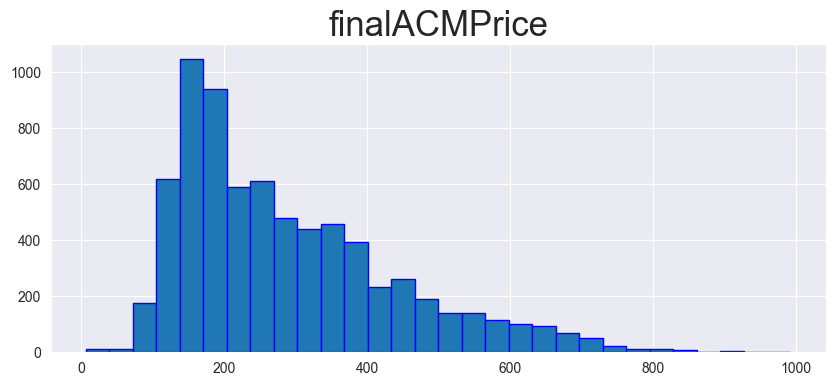

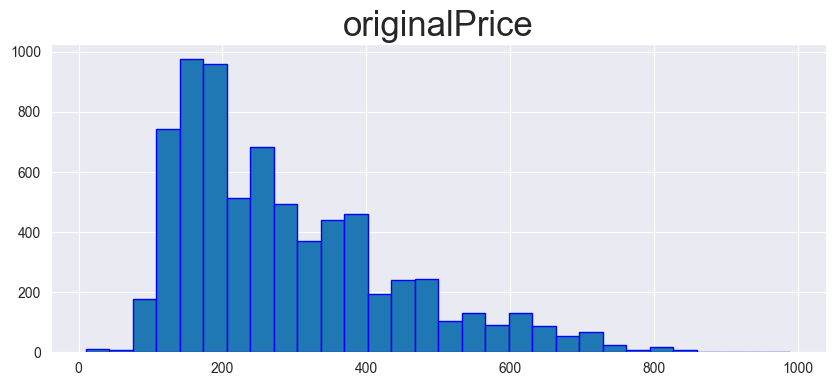

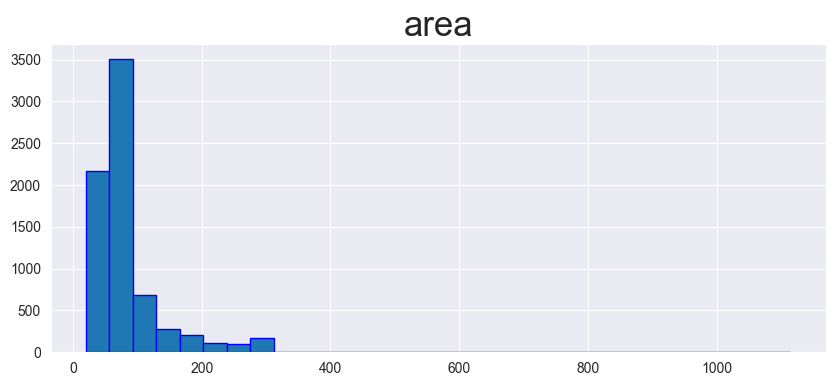

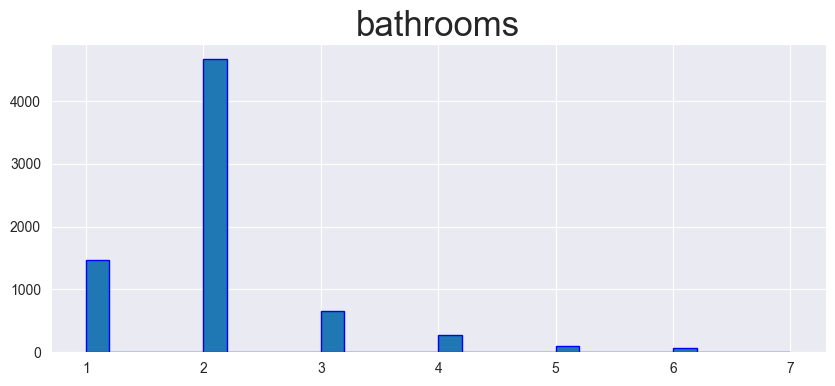

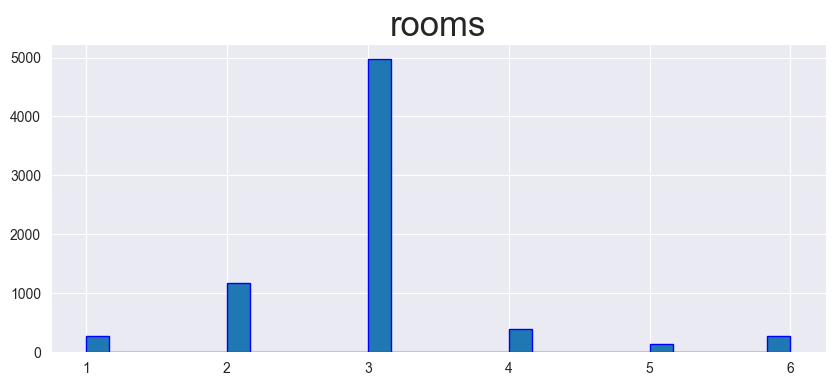

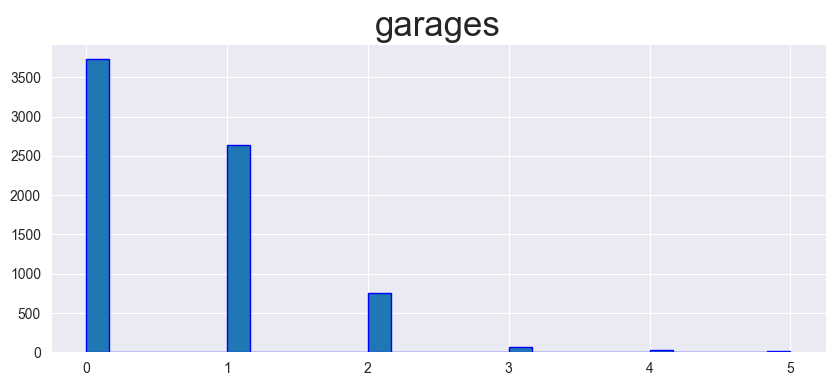

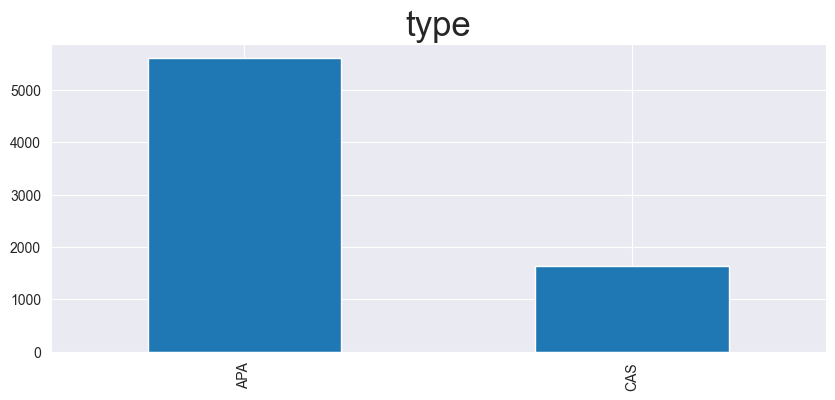

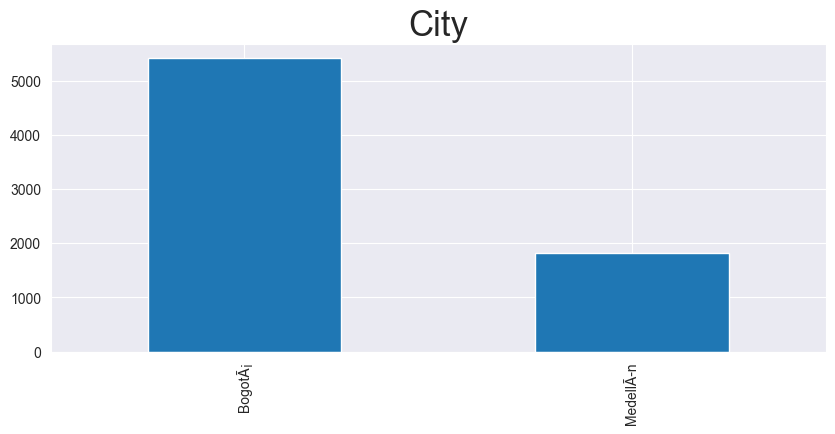

In [51]:
for i in numerical_features:
    desc_num_feature(i)

for i in categorical_features:
    desc_cat_feature(i)

In [52]:
# Convertir variable categorica en dummy

#dummy = pd.get_dummies(df2['type'], prefix='type')
#df2 = df2.drop('type', axis=1)
#df2 = pd.concat([df2, dummy], axis=1)

#dummy = pd.get_dummies(df2['City'], prefix='City')
#df2 = df2.drop('City', axis=1)
#df2 = pd.concat([df2, dummy], axis=1)


# Imputacion de datos faltantes
df2['area'] = df2['area'].fillna(round(df2['area'].median(), 1))
df2['bathrooms'] = df2['bathrooms'].fillna(round(df2['bathrooms'].median(), 1))
df2['rooms'] = df2['rooms'].fillna(round(df2['rooms'].mean(), 1))
df2['garages'] = df2['garages'].fillna(0)

#Revisar nulos
df2.isnull().sum()

id               0
finalACMPrice    0
originalPrice    0
area             0
bathrooms        0
rooms            0
garages          0
type             0
City             0
location         0
dtype: int64

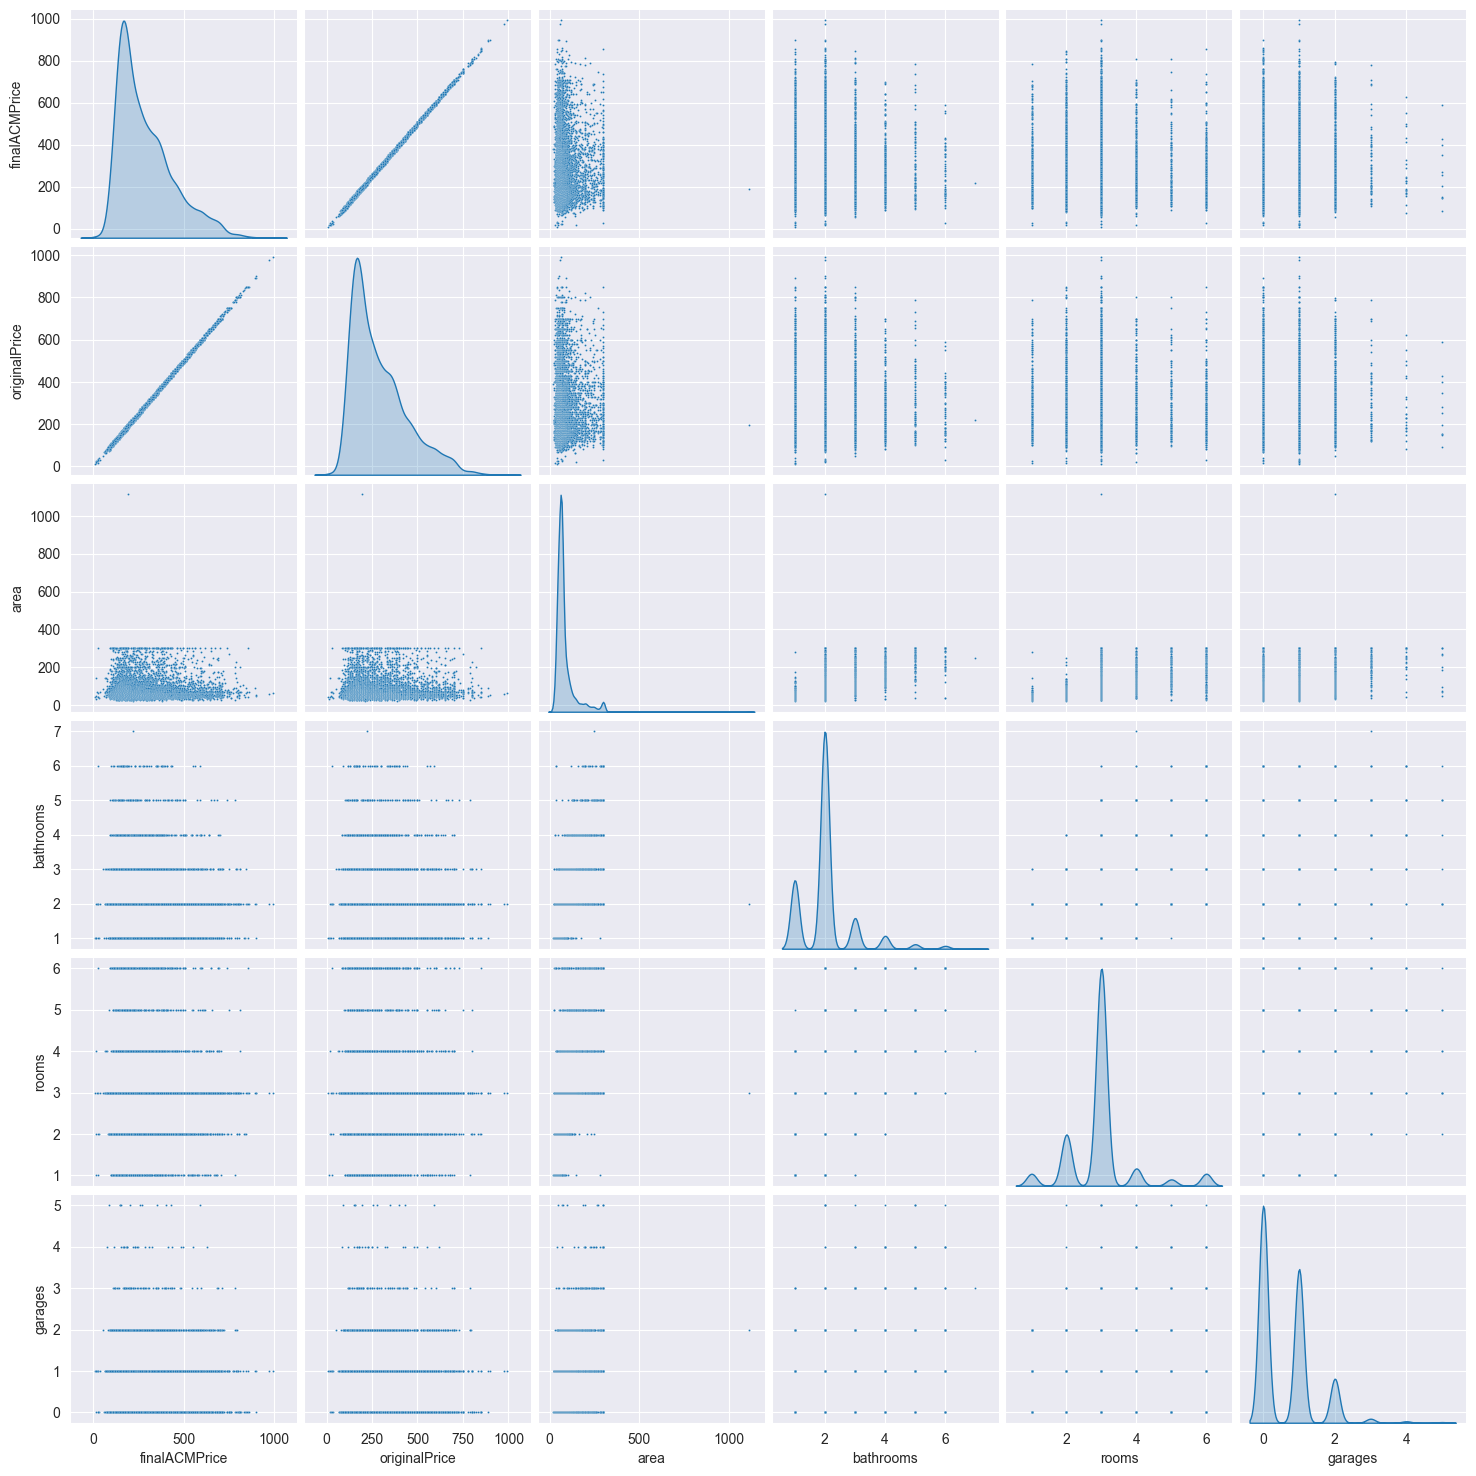

In [53]:
#CORRELACIONES
#graficos
#sns.pairplot(df2[numerical_features],plot_kws={"s":2})
sns.pairplot(df2[numerical_features],plot_kws={"s":2},diag_kind='kde')

In [55]:
#Matriz correlaciones
df2[numerical_features].corr()

,finalACMPrice,originalPrice,area,bathrooms,rooms,garages
finalACMPrice,1.000000,0.999200,0.002487,-0.011619,-0.010165,0.008760
originalPrice,0.999200,1.000000,0.002993,-0.011492,-0.010974,0.009934
area,0.002487,0.002993,1.000000,0.673284,0.604451,0.414056
bathrooms,-0.011619,-0.011492,0.673284,1.000000,0.597232,0.461869
rooms,-0.010165,-0.010974,0.604451,0.597232,1.000000,0.152362
garages,0.008760,0.009934,0.414056,0.461869,0.152362,1.000000


In [56]:
df2.to_csv('datos_depurados.csv')